In [1]:
import cv2
import numpy as np
import dlib
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from PIL import Image

detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")


face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')
lip_cascade = cv2.CascadeClassifier('haarcascade_smile.xml')

In [2]:
def getFace(img):
    faces = detector(img)
    for face in faces:
        x1 = face.left()
        y1 = face.top()
        x2 = face.right()
        y2 = face.bottom()
        #cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 3)

        landmarks = predictor(img, face)
    pts = []
    for n in range(0, 16):
        x = landmarks.part(n).x
        y = landmarks.part(n).y
        pts.append((x, y))
    for n in range(26, 21, -1):
        x = landmarks.part(n).x
        y = landmarks.part(n).y
        pts.append((x, y))
    for n in range(21, 16, -1):
        x = landmarks.part(n).x
        y = landmarks.part(n).y
        pts.append((x, y))

    x = landmarks.part(0).x
    y = landmarks.part(0).y
    pts.append((x, y))

    pts = np.array(pts)

    rect = cv2.boundingRect(pts)
    x,y,w,h = rect
    cropped = img[y:y+h, x:x+w].copy()
#     pts = pts - pts.min(axis=0)

#     mask = np.zeros(croped.shape[:2], np.uint8)
#     cv2.drawContours(mask, [pts], -1, (255, 255, 255), -1, cv2.LINE_AA)
#     dst = cv2.bitwise_and(croped, croped, mask=mask)

#     ## (4) add the white background
#     bg = np.ones_like(croped, np.uint8)*255
#     cv2.bitwise_not(bg,bg, mask=mask)
#     dst2 = bg+ dst

    return cropped

In [3]:
base_path = 'images/hand curated'
images_path = [base_path + '/' + x for x in os.listdir(base_path) if 'jpg' in x]

In [5]:
for x in images_path:
    img = cv2.imread(x, cv2.IMREAD_GRAYSCALE)
#     img = cv2.resize(img, (1000, 1300))
    cropped = getFace(img) 
    cropped = cv2.resize(cropped, (480, 500))
    img = Image.fromarray(cropped)
    img.save('images/1.jpg')
    break

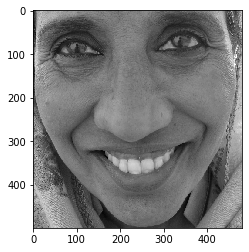

In [80]:
plt.imshow(cropped, cmap='gray')